# Importing essential libraries 

In [1]:
import pandas as pd
from tqdm import tqdm

# Reading the sample data

In [2]:
trans_data = pd.read_csv('transaction data.csv')

# Detecting Circular Transactions

In [3]:
# Initially all the transactions are suspecious
suspect_trans = trans_data
change = 1
flag = 1

# Empty variable to store circular transaction
circular_trans = []

# Iterate till the number of suspicious and circular transactions are same
while not change == 0:
    circular_trans = []
    
    # Print iterations and number of suspicious transaction at every iteration
    print("Iteration : ",flag,", No. of suspicious transactions : ",len(suspect_trans))
    
    # Checking weather the buyers are also the sellers
    for i in tqdm(set(suspect_trans['BuyerID'])):
        for j in range(len(suspect_trans['SellerID'])):
            if i == suspect_trans.loc[j,'SellerID']:
                
                # Recording that perticular transaction where buyer is sellling something
                circular_trans.append(suspect_trans.loc[j,'TransactionID'])
    
    change = len(suspect_trans) - len(circular_trans)
    
    # Now all the circular transactions are suspicious
    suspect_trans = suspect_trans.loc[suspect_trans['TransactionID'].isin(circular_trans)]  
    suspect_trans = suspect_trans.reset_index()
    del suspect_trans['index']
    flag += 1
    
# Testing in inverse manner
change = 1
while not change == 0:
    circular_trans = []
    print("Iteration : ",flag,", No. of suspicious transactions : ",len(suspect_trans))
    for i in tqdm(set(suspect_trans['SellerID'])):
        for j in range(len(suspect_trans['BuyerID'])):
            if i == suspect_trans.loc[j,'BuyerID']:
                circular_trans.append(suspect_trans.loc[j,'TransactionID'])
    change = len(suspect_trans) - len(circular_trans)
    suspect_trans = suspect_trans.loc[suspect_trans['TransactionID'].isin(circular_trans)]  
    suspect_trans = suspect_trans.reset_index()
    del suspect_trans['index']
    flag += 1

# Now we have the list of transactions that can male the loop
circular_trans = suspect_trans

Iteraation :  1 No. of suspicious transactions :  24186


100%|██████████████████████████████████████████████████████████████████████████████| 1713/1713 [07:30<00:00,  3.90it/s]


Iteraation :  2 No. of suspicious transactions :  1259


100%|██████████████████████████████████████████████████████████████████████████████| 1249/1249 [00:17<00:00, 72.60it/s]


Iteraation :  3 No. of suspicious transactions :  91


100%|█████████████████████████████████████████████████████████████████████████████████| 88/88 [00:00<00:00, 885.38it/s]


Iteraation :  4 No. of suspicious transactions :  62


100%|████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 1227.99it/s]


Iteraation :  5 No. of suspicious transactions :  47


100%|████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 1050.61it/s]


6 47 1


100%|████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 1128.09it/s]


7 30 17


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1603.28it/s]


8 27 3


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1715.90it/s]


# A look at the circular transactions

In [6]:
circular_trans

,TransactionID,SellerID,BuyerID,Amount(INR),Date
0,txn_1,TxUI7188,TxUI430,884850.0,8/8/2014
1,txn_2,TxUI430,TxUI160,841210.0,8/15/2013
2,txn_4,TxUI160,TxUI3010,860340.0,10/12/2012
3,txn_5,TxUI3010,TxUI89,407550.0,9/17/2012
4,txn_11,TxUI89,TxUI161,266483.0,11/1/2012
5,txn_12,TxUI89,TxUI256,275760.0,9/27/2014
6,txn_13,TxUI161,TxUI37,259170.0,10/15/2014
7,txn_14,TxUI256,TxUI37,417240.0,7/18/2012
8,txn_21,TxUI37,TxUI7188,413530.0,7/17/2013
9,txn_280,TxUI37H,TxUI7188H,34565.0,6/22/2012


# Lets plot and see in the directed graphs

C:\Users\Abhilash\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


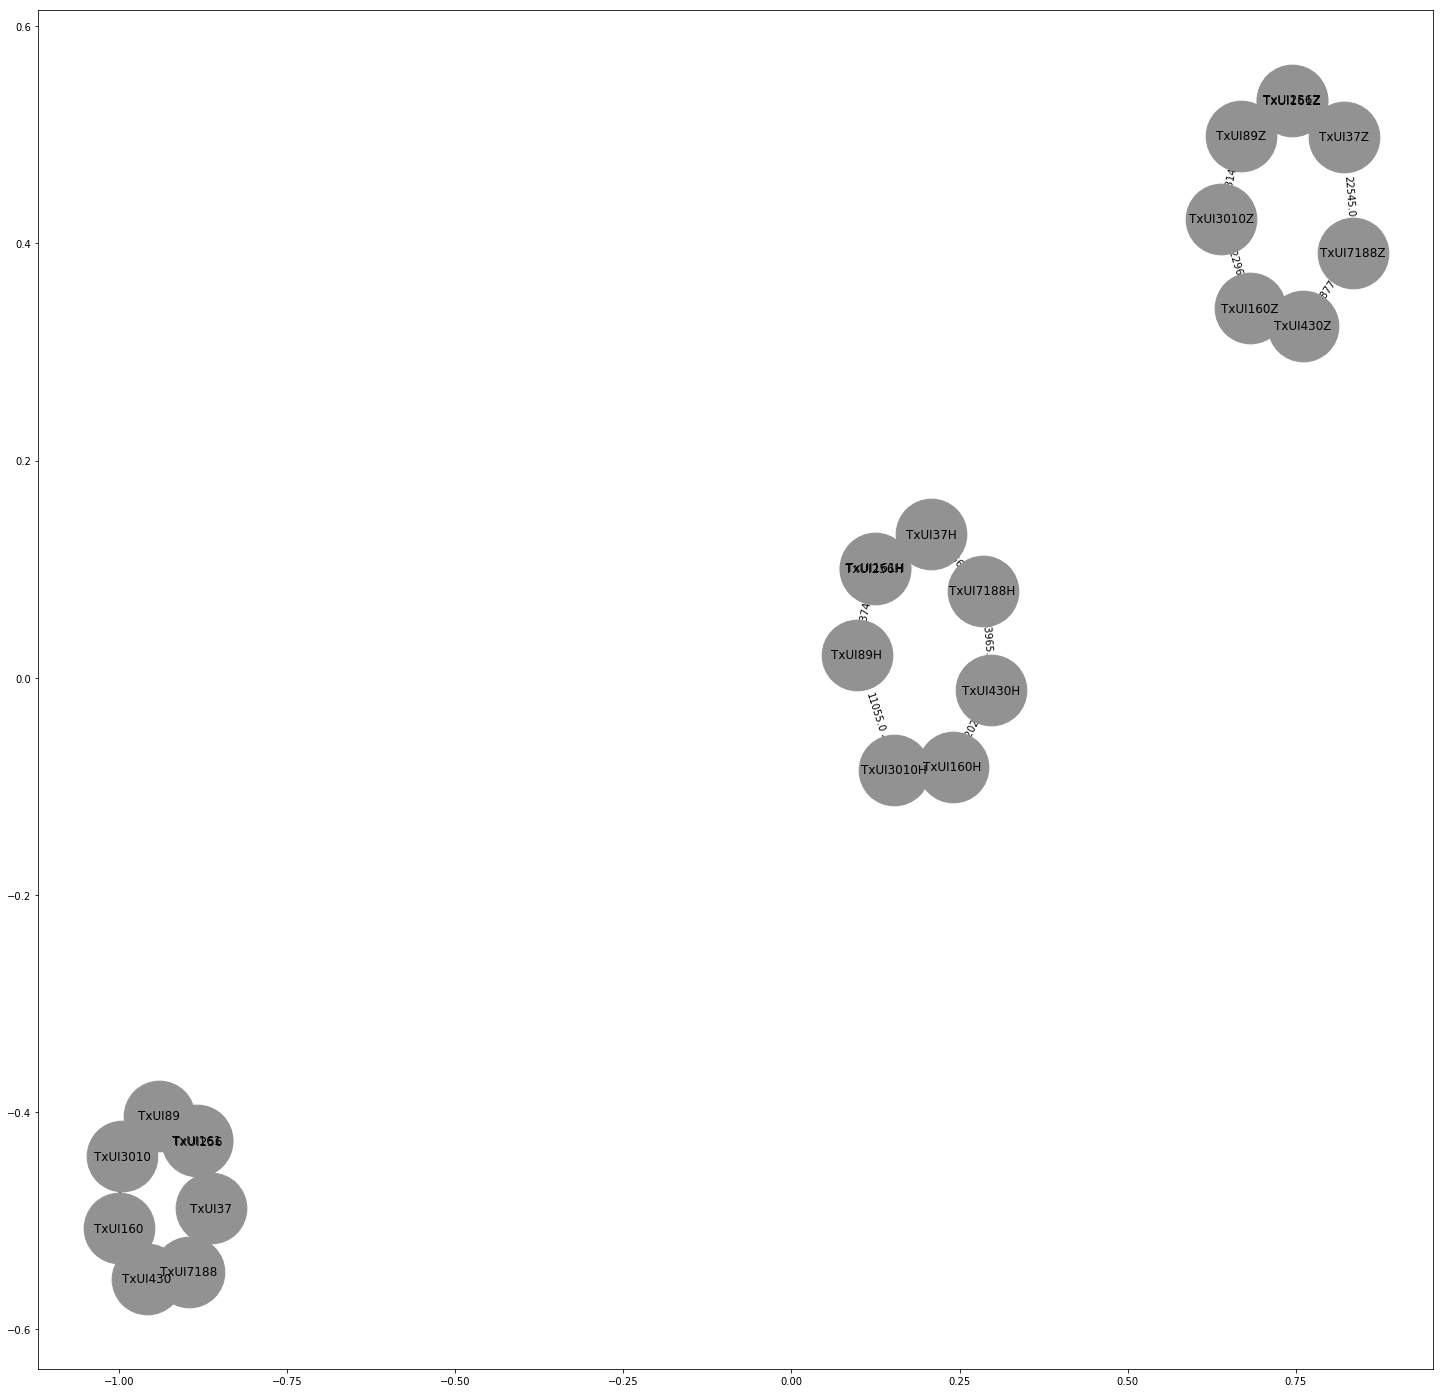

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))

G = nx.DiGraph()
for i in range(len(circular_trans)):
            G.add_edges_from([tuple(circular_trans.loc[i,['SellerID','BuyerID']])], weight=circular_trans.loc[i,'Amount(INR)'])

edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

edge_colours = ['black']
black_edges = [edge for edge in G.edges()]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = '0.5714285714285714', node_size = 5000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()
